<a href="https://colab.research.google.com/github/prakritrik/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [28]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation
numerical_features = gold_data.select_dtypes(include=['number'])

# Calculate correlation on numerical features
correlation = numerical_features.corr()
correlation_string = correlation.to_csv()
print(correlation_string)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.0,0.04934504087062633,-0.5915726046590082,-0.2740547313274675,-0.6720174249755966
GLD,0.04934504087062633,1.0,-0.18636016050323168,0.86663188126344,-0.024375466130593975
USO,-0.5915726046590082,-0.18636016050323168,1.0,0.16754707072332675,0.829317454476358
SLV,-0.2740547313274675,0.86663188126344,0.16754707072332675,1.0,0.3216312713168978
EUR/USD,-0.6720174249755966,-0.024375466130593975,0.829317454476358,0.3216312713168978,1.0



In [32]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

numerical_features = gold_data.select_dtypes(include=['number'])

In [34]:
correlation = numerical_features.corr()
correlation_string = correlation.to_csv()
print(correlation_string)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.0,0.04934504087062633,-0.5915726046590082,-0.2740547313274675,-0.6720174249755966
GLD,0.04934504087062633,1.0,-0.18636016050323168,0.86663188126344,-0.024375466130593975
USO,-0.5915726046590082,-0.18636016050323168,1.0,0.16754707072332675,0.829317454476358
SLV,-0.2740547313274675,0.86663188126344,0.16754707072332675,1.0,0.3216312713168978
EUR/USD,-0.6720174249755966,-0.024375466130593975,0.829317454476358,0.3216312713168978,1.0



<Axes: >

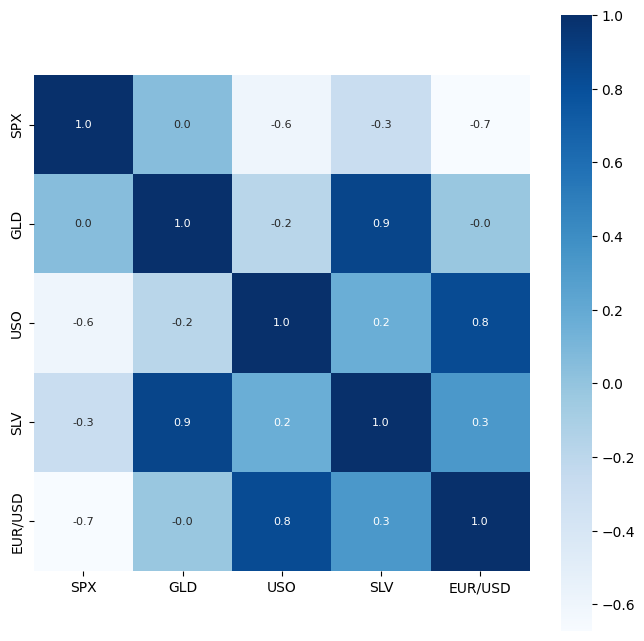

In [35]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-13-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

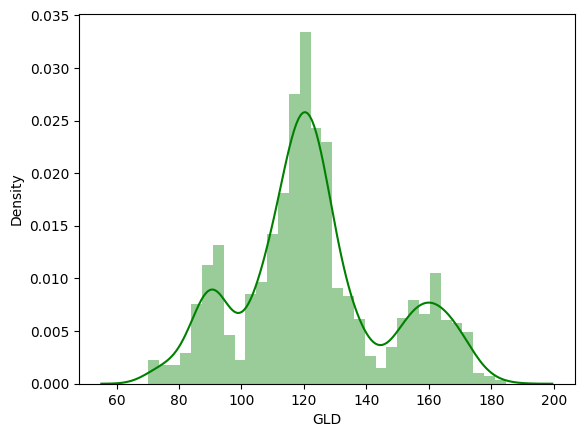

In [13]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.54739946  82.35639947 116.08829961 127.73390094 120.48320163
 154.68939817 150.18249826 125.98530018 117.56399867 126.1082005
 116.8576009  172.23800064 141.77959906 167.88449871 115.13780037
 117.89100041 137.62250258 169.93070059 159.4611027  157.4744996
 155.10410043 125.38999987 176.69769954 157.1979033  125.17980031
  93.8931999   77.66060034 120.48669976 119.11799958 167.58089957
  88.29060037 125.18490006  91.0886007  117.75490002 121.13659895
 136.58070115 115.41770125 115.34260089 146.91289933 107.36340081
 104.49570241  87.17959802 126.50860028 118.12060015 152.72199925
 119.61790008 108.3121002  108.08379886  93.28050101 126.96249837
  74.86290027 113.6260994  121.54049979 111.18319949 118.8478988
 120.66699949 159.31500019 166.93190136 146.92319652  85.77359836
  94.3499005   86.90659898  90.55410039 118.92310109 126.45170108
 127.52960016 169.73539969 122.20689902 117.38789897  98.50289977
 168.521102   143.14409811 131.96820203 121.03370166 120.99819951
 119.65960072

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892204872056369


Compare the Actual Values and Predicted Values in a Plot

In [24]:
Y_test = list(Y_test)

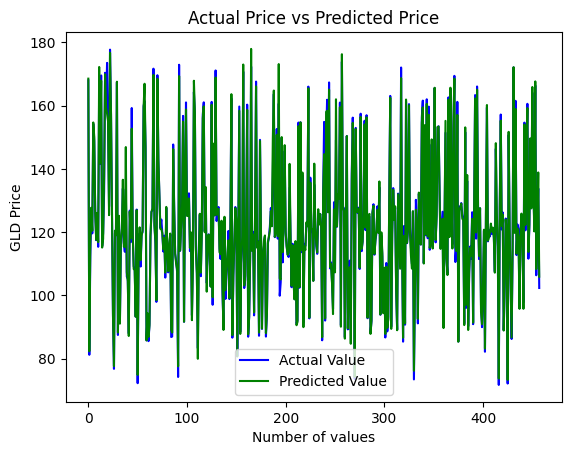

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()